# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

/home/ubuntu/anaconda3/envs/rl-quad-dlnd/lib/python3.6/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/rl-quad-dlnd/lib/python3.6/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


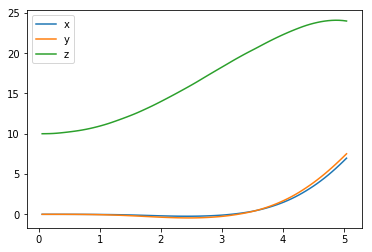

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

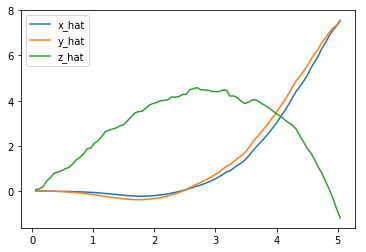

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

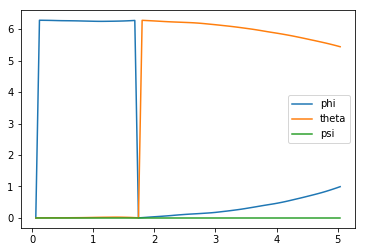

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

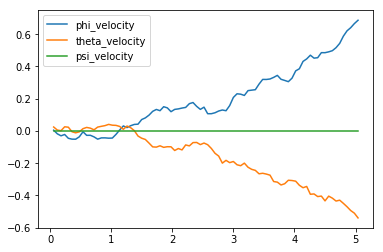

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

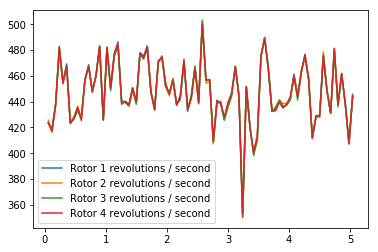

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 6.96688929  7.51239706 23.99128294  0.99305511  5.44114377  0.        ]
[ 7.55995155  7.51781737 -1.18941103]
[ 0.68658355 -0.53939357  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

# num_episodes = 1000
num_episodes = 0
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [20]:
import random
from agents.replay_buffer import ReplayBuffer

class UpAgent():
    def __init__(self, task):
        self.task = task
        
        # Replay memory
        self.buffer_size = 100000
        self.batch_size = 256
        self.memory = ReplayBuffer(self.buffer_size, self.batch_size)
        self.previous_thrust = 404
    
    
# labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
#           'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
#           'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'reward']
    def act(self, state):
#         new_thrust = max(self.previous_thrust + min((10. - state[2]) * random.random() * 100, 3), 0)
        new_thrust = self.previous_thrust + (10 - state[2]) * random.random() * 0.01
        self.previous_thrust = new_thrust
#         new_thrust = 404
        return [new_thrust for x in range(4)]

    def reset_episode(self):
        state = self.task.reset()
        self.last_state = state
#         self.previous_thrust = random.gauss(550., 100.)
        self.previous_thrust = 404
        return state
    
    def step(self, action, reward, next_state, done):
         # Save experience / reward
        self.memory.add(self.last_state, action, reward, next_state, done)

        # Roll over last state and action
        self.last_state = next_state
        

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


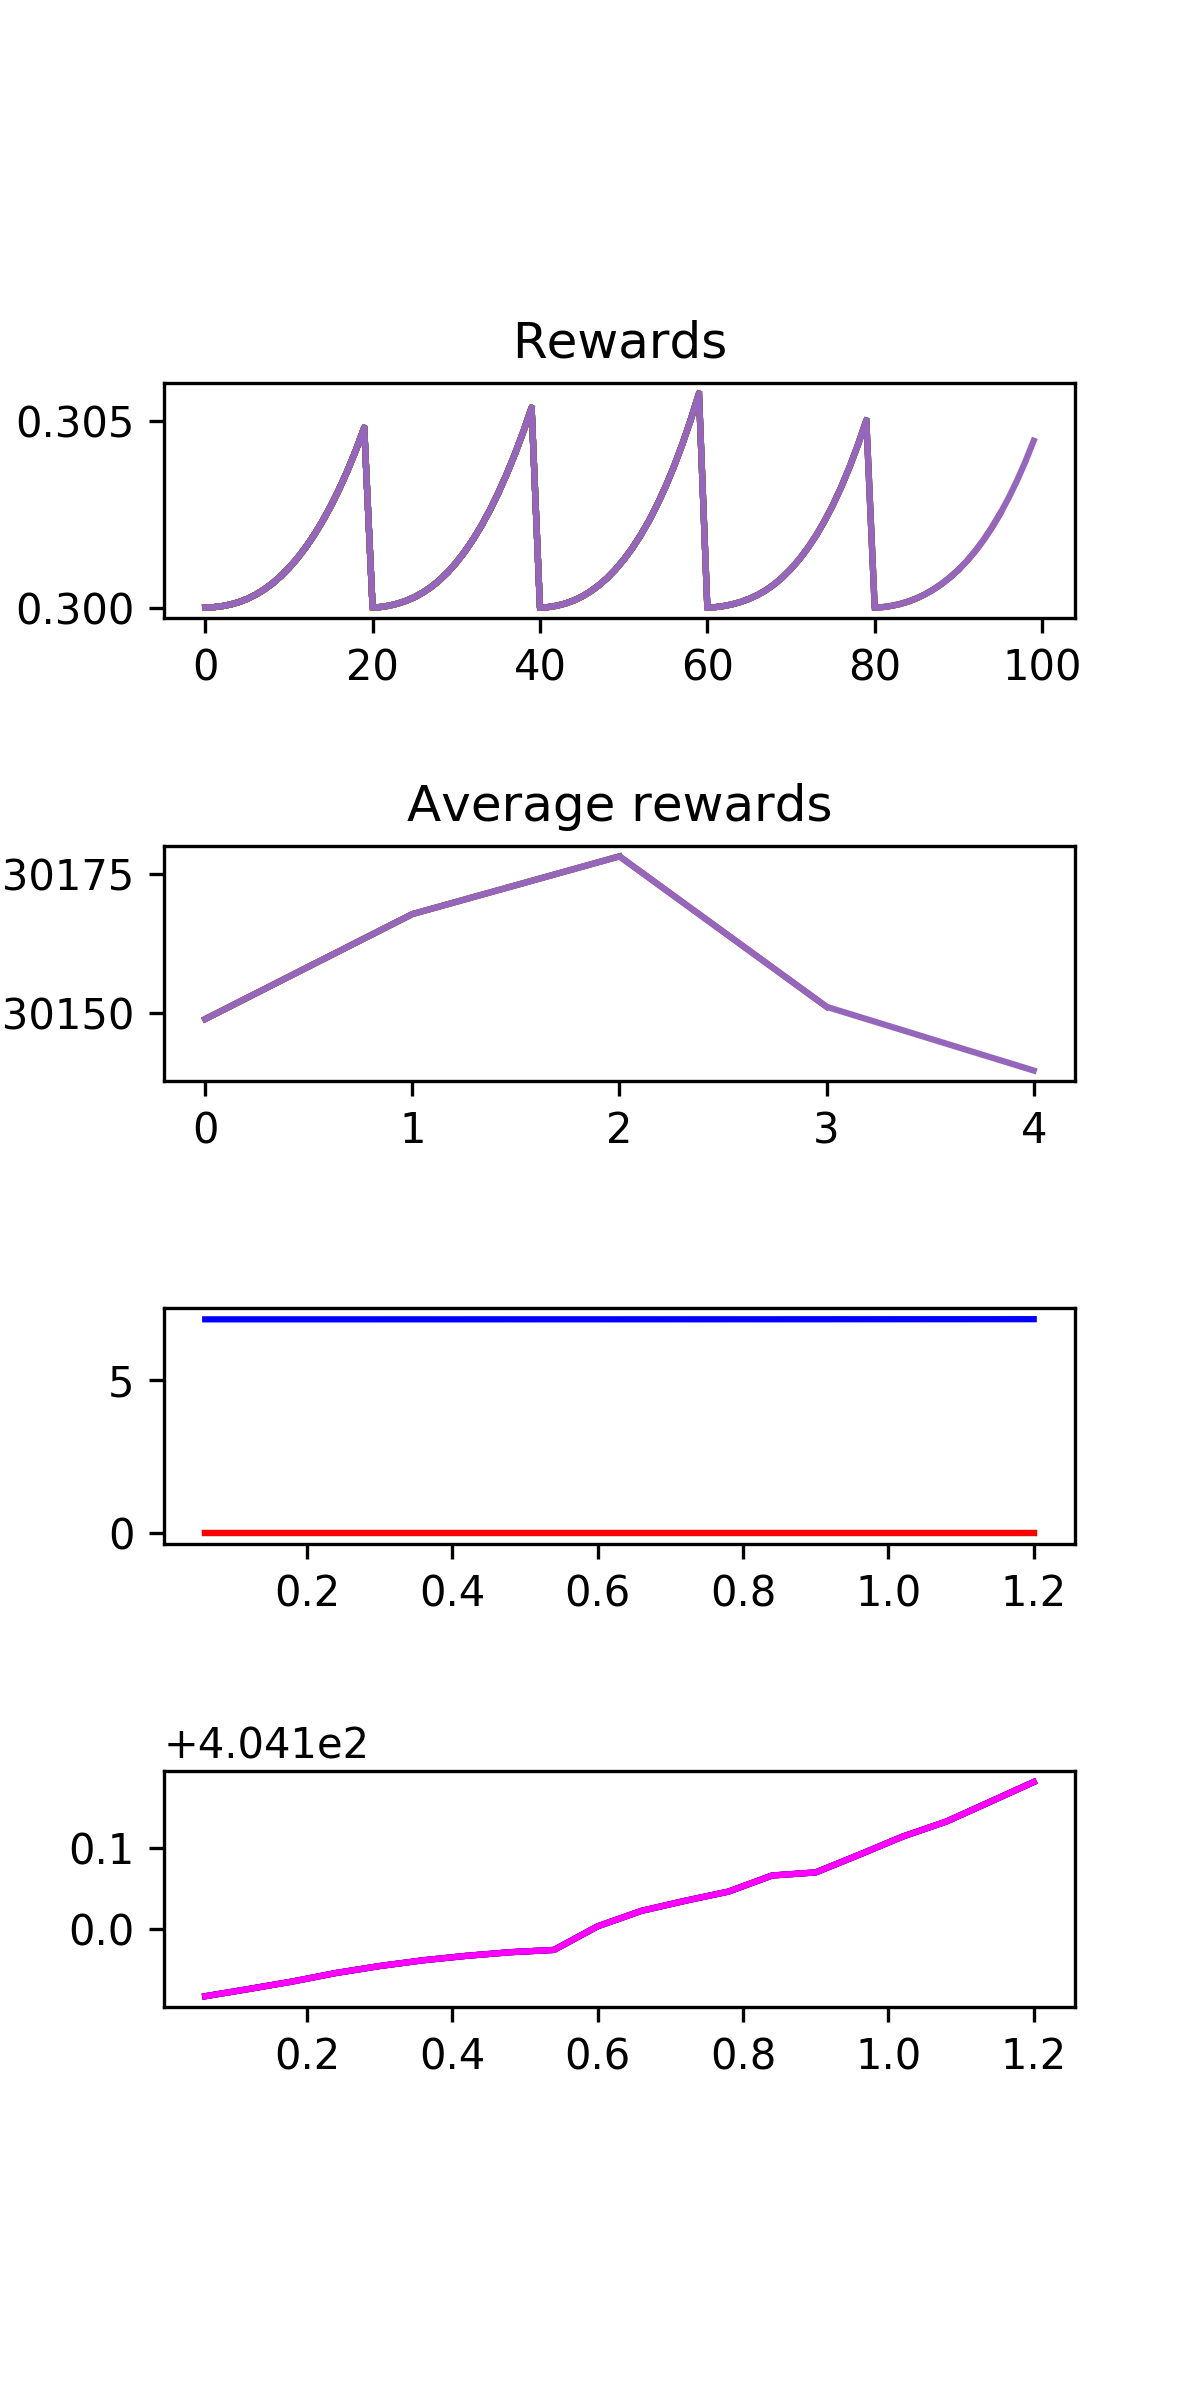

In [29]:
## TODO: Train your agent here.
%load_ext autoreload
%autoreload 2
from runner import Runner
import numpy as np
import matplotlib.pyplot as plt
from hover_task import HoverTask
from agents.agent import DDPG

plt.rcParams['figure.dpi'] = 150
%matplotlib notebook

# Modify the values below to give the quadcopter a different starting position.
runtime = 20.                                     # time limit of the episode
init_pose = np.array([0., 0., 7., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

task = HoverTask(init_pose, init_velocities, init_angle_velocities, runtime)
agent = UpAgent(task)

runner = Runner(task, agent)

runner.run(runtime=runtime, should_write=True, num_episode=5)

In [9]:
## TODO: Train your agent here.
%load_ext autoreload
%autoreload 2

import sys
from hover_task import HoverTask
from agents.agent import DDPG
import numpy as np
import csv


import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
%matplotlib notebook

# Modify the values below to give the quadcopter a different starting position.
runtime = 250.                                     # time limit of the episode
init_pose = np.array([0., 0., 7., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results
    
num_episode = 5

# general configuration
display_graph = True
display_freq = 5

task = HoverTask(init_pose, init_velocities, init_angle_velocities, runtime)
agent = UpAgent(task)

fig1, (ax11, ax12, ax_x) = plt.subplots(3, 1)


ax11.set_title("Rewards")
ax12.set_title("Average rewards")
ax_x.set_title("x, y, z")

fig1.tight_layout(pad=4.0, w_pad=1.0, h_pad=0.1)
fig1.set_size_inches(4, 8)
fig1.show()

def plt_dynamic_reward(rewards):
    ax11.plot(rewards)
    fig1.canvas.draw()
    
def plt_dynamic_reward_means(reward_means):
    ax12.plot(reward_means)
    fig1.canvas.draw()
    
def plt_dynamic_x_y_z(results_per_episode):
    ax_x.clear()
    ax_x.plot(results_per_episode['time'], results_per_episode['x'], label='x', color='green')
    ax_x.plot(results_per_episode['time'], results_per_episode['y'], label='y', color='red')
    ax_x.plot(results_per_episode['time'], results_per_episode['z'], label='z', color='blue')
    fig1.canvas.draw()
    
done = False

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'reward']
results = {x : [] for x in labels}
rewards = []
reward_means = []
    
max_time_steps = int(runtime)

for i_episode in range(1, num_episode + 1):
    state = agent.reset_episode()
    task.reset()
    episode_rewards = []
    results_per_episode = {x : [] for x in labels}
    for i, t in enumerate(range(max_time_steps)):
        rotor_speeds = agent.act(state)
        next_state, reward, done = task.step(rotor_speeds)
        agent.step(rotor_speeds, reward, next_state, done)

        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        to_write.append(reward)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
            results_per_episode[labels[ii]].append(to_write[ii])

        rewards.append(reward)
        episode_rewards.append(reward)

        state = next_state

        if done or i == max_time_steps-1:
            if display_graph:
                plt_dynamic_reward(rewards)
                reward_means.append(np.mean(episode_rewards))
                plt_dynamic_x_y_z(results_per_episode)
                plt_dynamic_reward_means(reward_means)
            break
        else:
            if t % display_freq == 0:
                plt_dynamic_reward(rewards)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'UpAgent' is not defined

In [72]:
for i in list(agent.memory.memory):
    print("z", i.state[2], "reward", i.reward, "action", i.action)

z 0.0 reward -6.839416284791847 action [748.621952649184, 748.621952649184, 748.621952649184, 748.621952649184]
z 0.0047772580568110155 reward -8.042235503136952 action [751.621952649184, 751.621952649184, 751.621952649184, 751.621952649184]
z 0.07642878559025576 reward -9.165595079478107 action [754.621952649184, 754.621952649184, 754.621952649184, 754.621952649184]
z 0.23431071540153153 reward -10.199239036746803 action [757.621952649184, 757.621952649184, 757.621952649184, 757.621952649184]
z 0.47817796064506335 reward -11.13403201617132 action [760.621952649184, 760.621952649184, 760.621952649184, 760.621952649184]
z 0.8070769168425994 reward -11.962240364487364 action [763.621952649184, 763.621952649184, 763.621952649184, 763.621952649184]
z 1.2193820086986435 reward -12.677742189469058 action [766.621952649184, 766.621952649184, 766.621952649184, 766.621952649184]
z 1.7128530761598182 reward -13.276155044778218 action [769.621952649184, 769.621952649184, 769.621952649184, 769.621

z 5.788390838950605 reward -8.75878619449648 action [585.8366813715537, 585.8366813715537, 585.8366813715537, 585.8366813715537]
z 6.3451414961893455 reward -8.571251123433479 action [588.8366813715537, 588.8366813715537, 588.8366813715537, 588.8366813715537]
z 6.925088183781579 reward -8.35523532604194 action [591.8366813715537, 591.8366813715537, 591.8366813715537, 591.8366813715537]
z 7.527694041900671 reward -8.111062825212496 action [594.8366813715537, 594.8366813715537, 594.8366813715537, 594.8366813715537]
z 8.152406710668302 reward -7.839129871630252 action [597.8366813715537, 597.8366813715537, 597.8366813715537, 597.8366813715537]
z 8.798662770227425 reward -7.536002745200187 action [599.2776844209619, 599.2776844209619, 599.2776844209619, 599.2776844209619]
z 9.465869446528789 reward -7.898028819952067 action [600.7969772481703, 600.7969772481703, 600.7969772481703, 600.7969772481703]
z 10.153146604423208 reward -8.807780099667657 action [599.5248082519261, 599.5248082519261

z 22.7362067776032 reward -14.781011363248247 action [0, 0, 0, 0]
z 23.16058977749169 reward -14.478741781020808 action [0, 0, 0, 0]
z 23.54143551500057 reward -14.160764996671261 action [0, 0, 0, 0]
z 23.880376059919506 reward -13.825149410201355 action [0, 0, 0, 0]
z 24.178813477765004 reward -13.470102627138417 action [0, 0, 0, 0]
z 24.437944903181165 reward -13.093929444848133 action [0, 0, 0, 0]
z 24.65878298985179 reward -12.694996128116014 action [0, 0, 0, 0]
z 24.842172527578512 reward -12.271699288496247 action [0, 0, 0, 0]
z 24.988803836503887 reward -11.822438029993904 action [0, 0, 0, 0]
z 25.09922340816754 reward -11.345588269533442 action [0, 0, 0, 0]
z 25.173842152237743 reward -10.860996457669764 action [0, 0, 0, 0]
z 25.212941518355294 reward -11.073412312046486 action [0, 0, 0, 0]
z 25.216677688579498 reward -11.565268525737736 action [0, 0, 0, 0]
z 25.185083972844946 reward -12.028063367660742 action [0, 0, 0, 0]
z 25.11807148397068 reward -12.463448730841678 action 

z 26.48897452871749 reward -15.737006364392283 action [0, 0, 0, 0]
z 26.759927254222582 reward -15.367423787194719 action [0, 0, 0, 0]
z 26.992297561170144 reward -14.975572646186972 action [0, 0, 0, 0]
z 27.18697966248887 reward -14.559843409151377 action [0, 0, 0, 0]
z 27.344709544159443 reward -14.118637218964913 action [0, 0, 0, 0]
z 27.466076399802436 reward -13.6503396576271 action [0, 0, 0, 0]
z 27.551531572274122 reward -13.153296028850995 action [0, 0, 0, 0]
z 27.601395296980513 reward -13.074957477079312 action [0, 0, 0, 0]
z 27.61586146351757 reward -13.575976820663964 action [0, 0, 0, 0]
z 27.595000546286865 reward -14.047419423775604 action [0, 0, 0, 0]
z 27.53876079702221 reward -14.490957393131321 action [0, 0, 0, 0]
z 27.4469677394948 reward -14.908204505222045 action [0, 0, 0, 0]
z 27.319321956261497 reward -15.300739959514104 action [0, 0, 0, 0]
z 27.155395106596607 reward -15.670132838943445 action [0, 0, 0, 0]
z 26.95462406110068 reward -16.017968100147424 action [0

z 0.05978412562065229 reward -7.105725270958141 action [522.4486716097363, 522.4486716097363, 522.4486716097363, 522.4486716097363]
z 0.12305898632674492 reward -7.377635980401569 action [525.4486716097363, 525.4486716097363, 525.4486716097363, 525.4486716097363]
z 0.20972707824011555 reward -7.634521524268106 action [528.4486716097363, 528.4486716097363, 528.4486716097363, 528.4486716097363]
z 0.32027465916163467 reward -7.875142565485541 action [531.4486716097363, 531.4486716097363, 531.4486716097363, 531.4486716097363]
z 0.4551321554088533 reward -8.098281972615268 action [534.4486716097363, 534.4486716097363, 534.4486716097363, 534.4486716097363]
z 0.6146716664127645 reward -8.302754814352845 action [537.4486716097363, 537.4486716097363, 537.4486716097363, 537.4486716097363]
z 0.7992049948287471 reward -8.487418290170275 action [540.4486716097363, 540.4486716097363, 540.4486716097363, 540.4486716097363]
z 1.008982241580891 reward -8.651181395344 action [543.4486716097363, 543.44867

In [28]:
from collections import deque
temp_memory = agent.memory.memory
experiences_to_mimic = deque(list(temp_memory) * 5)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


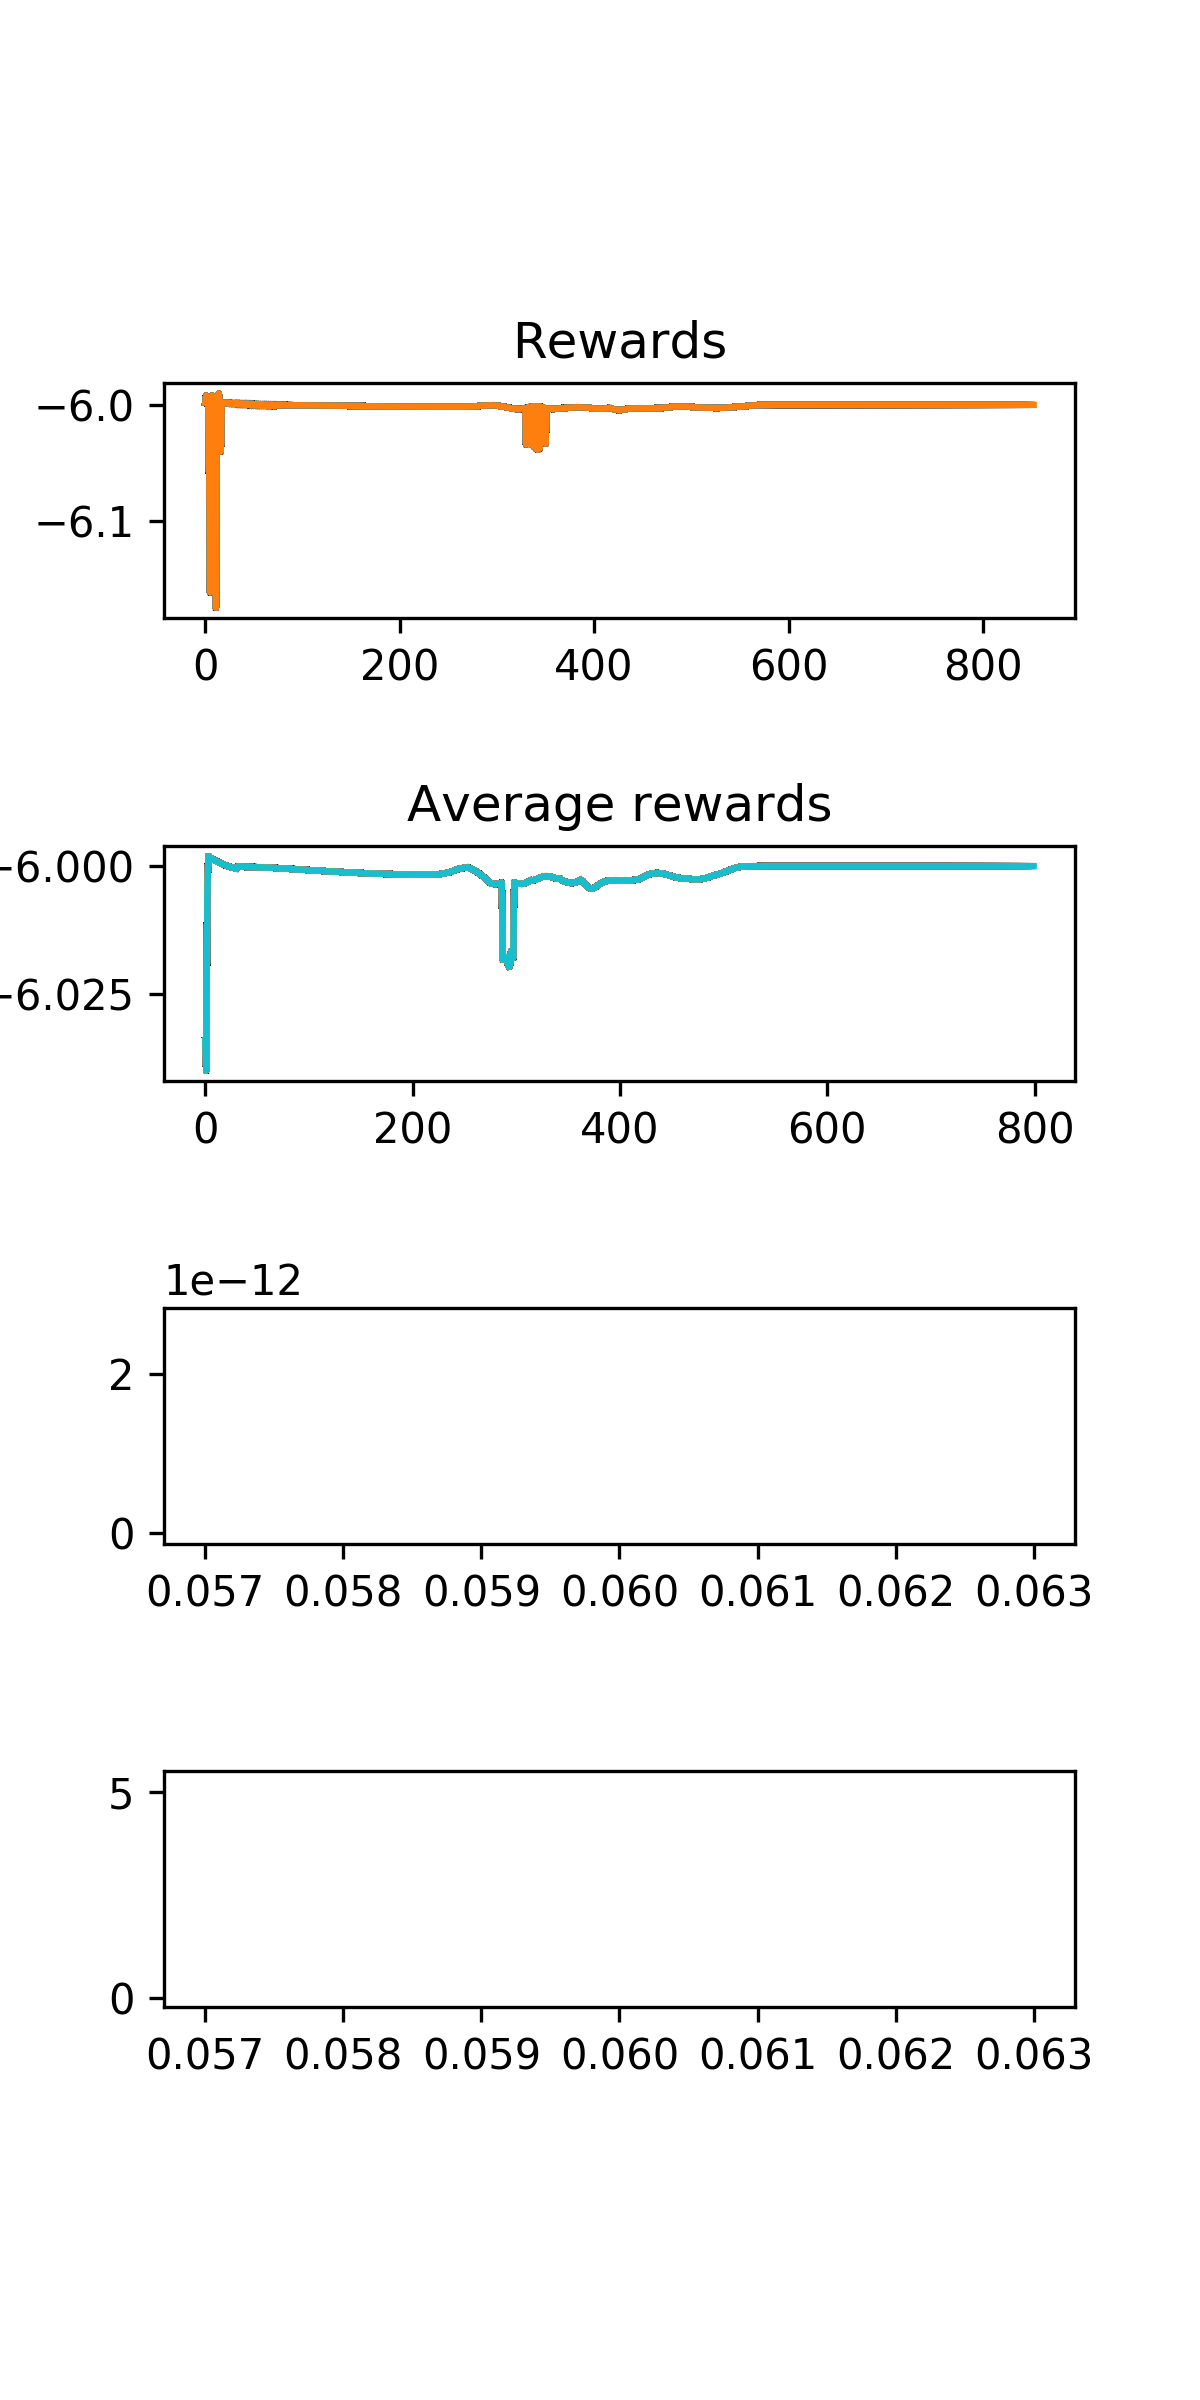

ready to mimic


In [31]:
## TODO: Train your agent here.
%load_ext autoreload
%autoreload 2

import sys
from hover_task import HoverTask
from agents.agent import DDPG
import numpy as np
import csv
import numpy as np


import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150


%matplotlib notebook

# Modify the values below to give the quadcopter a different starting position.
runtime = 100.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results
    
num_episode = 800

# general configuration
display_graph = True
display_freq = 5

task = HoverTask(init_pose, init_velocities, init_angle_velocities, runtime)
agent = DDPG(task)

fig1, (ax11, ax12, ax_x, ax_rotors) = plt.subplots(4, 1)


ax11.set_title("Rewards")
ax12.set_title("Average rewards")
ax_x.set_title("x, y, z")
ax_rotors.set_title("rotor speeds")

fig1.tight_layout(pad=4.0, w_pad=1.0, h_pad=0.1)
fig1.set_size_inches(4, 8)
fig1.show()

def plt_dynamic_reward(rewards):
    ax11.plot(rewards)
    fig1.canvas.draw()
    
def plt_dynamic_reward_means(reward_means):
    ax12.plot(reward_means)
    fig1.canvas.draw()
    
def plt_dynamic_x_y_z(results_per_episode):
    ax_x.clear()
    ax_x.plot(results_per_episode['time'], results_per_episode['x'], label='x', color='green')
    ax_x.plot(results_per_episode['time'], results_per_episode['y'], label='y', color='red')
    ax_x.plot(results_per_episode['time'], results_per_episode['z'], label='z', color='blue')
    fig1.canvas.draw()
    
def plt_dynamic_rotors(results_per_episode):
    ax_rotors.clear()
    ax_rotors.plot(results_per_episode['time'], results_per_episode['rotor_speed1'], label='1', color='green')
    ax_rotors.plot(results_per_episode['time'], results_per_episode['rotor_speed2'], label='2', color='red')
    ax_rotors.plot(results_per_episode['time'], results_per_episode['rotor_speed3'], label='3', color='blue')
    ax_rotors.plot(results_per_episode['time'], results_per_episode['rotor_speed4'], label='4', color='magenta')
    fig1.canvas.draw()
    
done = False

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'reward']
results = {x : [] for x in labels}
rewards = []
reward_means = []
    
max_time_steps = int(runtime)
            
# experiences_to_mimic = create_mimic_experiences()
agent.mimic(experiences_to_mimic)

with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episode + 1):
        state = agent.reset_episode()
        task.reset()
        episode_rewards = []
        results_per_episode = {x : [] for x in labels}
        for i, t in enumerate(range(max_time_steps)):
            rotor_speeds = agent.act(state)
            next_state, reward, done = task.step(rotor_speeds)
            agent.step(rotor_speeds, reward, next_state, done)

            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            to_write.append(reward)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
                results_per_episode[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            
            rewards.append(reward)
            episode_rewards.append(reward)
            
            state = next_state
            
            if done or i == max_time_steps-1:
                if display_graph:
                    plt_dynamic_reward(rewards)
                    reward_means.append(np.mean(episode_rewards))
                    plt_dynamic_x_y_z(results_per_episode)
                    plt_dynamic_reward_means(reward_means)
                    plt_dynamic_rotors(results_per_episode)
                break
            else:
                if t % display_freq == 0:
                    plt_dynamic_reward(rewards)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

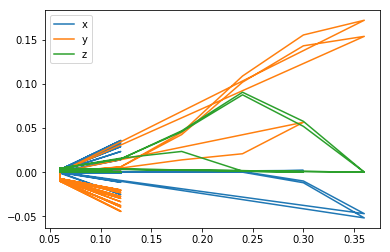

In [32]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: